# Exercise 2: Crime Dataset (Regression)

### Import Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/rabehayari/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/rabehayari/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### Load Dataset

In [2]:
#Now let's import and put the crime_prep dataset in a pandas dataframe
df = pd.read_csv('crime_prep.csv')
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


In [3]:
df.shape

(1994, 128)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, target to v_cont_126
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
count,1994.000000,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,319.000000,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000
mean,0.237979,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,...,0.305987,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078
std,0.232985,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,...,0.226884,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718
min,0.000000,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,...,0.140000,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000
50%,0.150000,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,...,0.260000,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000
75%,0.330000,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,...,0.395000,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000
max,1.000000,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing Data
Sorting features with missing values

In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
v_cont_126,1675,0.84002
v_cont_113,1675,0.84002
v_cont_101,1675,0.84002
v_cont_103,1675,0.84002
v_cont_104,1675,0.84002


In [7]:
#drop features with the highest number of missing values 
df = df.drop((missing_data[missing_data['Total'] == 1675]).index,1)

In [8]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
v_cat_1,1177,0.590271
v_cat_0,1174,0.588766
v_cont_30,1,0.000502
v_cont_125,0,0.000000
v_cont_38,0,0.000000


Here we remove these two features with the other non-predictive categorical features.

In [9]:
df.drop(['v_cat_0', 'v_cat_1', 'v_cat_2', 'v_cat_3'], axis=1, inplace=True)

In [10]:
df.shape

(1994, 102)

In [11]:
df.head()

,target,v_cont_0,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,...,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_118,v_cont_119,v_cont_120,v_cont_125
0,0.20,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.67,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.43,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.12,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.03,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


In [12]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
v_cont_30,1,0.000502
v_cont_125,0,0.000000
v_cont_40,0,0.000000
v_cont_31,0,0.000000
v_cont_32,0,0.000000


The final remaining missing value is imputed with feature's mean

In [13]:
#df.dropna(axis=0, inplace=True)
imp = Imputer(missing_values=np.nan, strategy="mean")
imp = imp.fit(df[['v_cont_30']])
df[['v_cont_30']] = imp.transform(df[['v_cont_30']])

In [14]:
df.isnull().sum().max() #just double checking that there's no missing data missing...

0

In [15]:
#just ensuring that there's no duplicated rows...
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1994, 102)

At this stage we still have only one categorical variable which is the State. Lets check the distribution of our target variable among the different states.

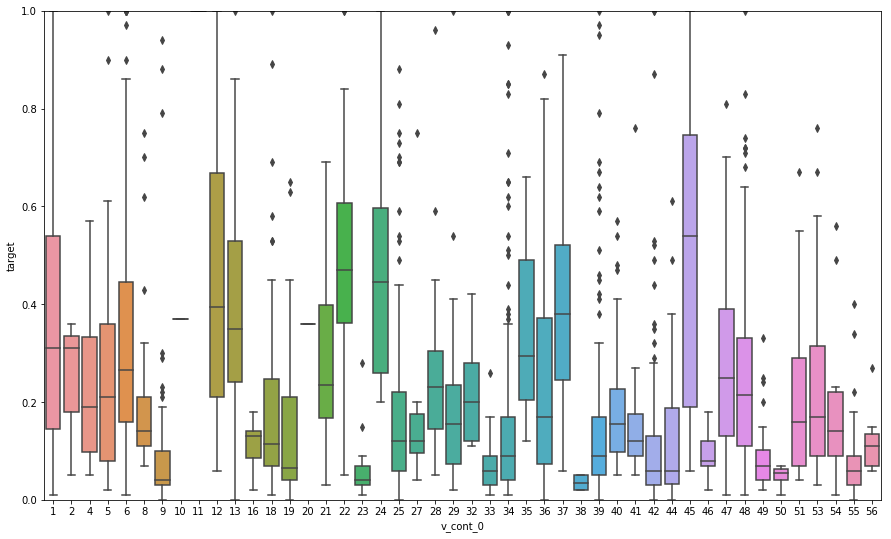

In [17]:
#box plot State/Target
var = 'v_cont_0'
data = pd.concat([df['target'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 9))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=0, ymax=1);

###### PS: Categorical features with high cardinality are not good candidates for one hot encoding
=> Since the state may implecitly contains useful information to predict crime rate due to <b>legislation, proximity</b> and may be other factors. Implement <b> mean encoding</b> for the state variable can bring more value to this feature. Compared to label encoding, with mean encoding we can get fewer splits, faster learning, models can utilize the linear relationships between labels and target. Less bias, since now labels have more meaning: closer labels mean closer categories in terms of the mean target variable.

### Target Variable (Crime Rate)

In [18]:
#Target Variable statistics summary
df['target'].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: target, dtype: float64

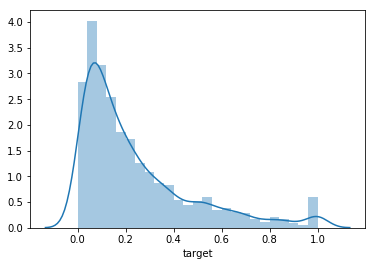

In [19]:
sns.distplot(df['target'])

In [20]:
df.shape

(1994, 102)


 mu = 0.24 and sigma = 0.23



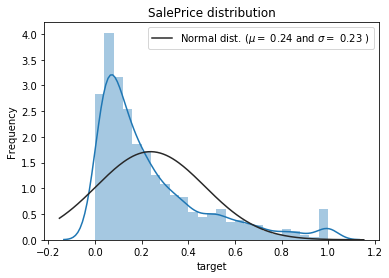

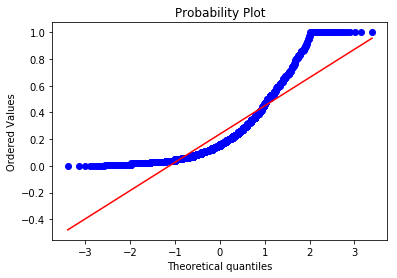

In [21]:
sns.distplot(df['target'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['target'], plot=plt)
plt.show()

In [22]:
#skewness and kurtosis
print("Skewness: %f" % df['target'].skew())
print("Kurtosis: %f" % df['target'].kurt())

Skewness: 1.522598
Kurtosis: 1.833268


The skewness is greater than 1 => Our target variable distribution is highly skewed.
In order to fix the normality of our dependent variable, we need to transform it and make it more normally distributed.

#### Log-transformation of the target variable


 mu = 0.20 and sigma = 0.17



Text(0.5, 1.0, 'SalePrice distribution')

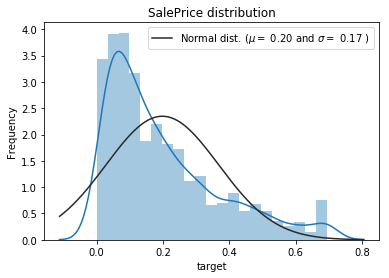

In [23]:
#We use the numpy fuction log1p which applies log(1+x) to all elements since we have zeros
df["target"] = np.log1p(df["target"]);

#Check the new distribution 
sns.distplot(df['target'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["target"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

### Train/Test Split

Before moving forward, we need to split our dataset in train (80%) and test (20%) sets.

In [24]:
#Train/Test Split
X = df.drop('target', axis=1)
y = df['target']
#We will keep 20% of our data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.head()

,v_cont_0,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,v_cont_11,v_cont_12,v_cont_13,...,v_cont_95,v_cont_96,v_cont_97,v_cont_98,v_cont_99,v_cont_100,v_cont_118,v_cont_119,v_cont_120,v_cont_125
228,45,0.00,0.45,0.81,0.35,0.03,0.01,0.58,0.54,0.45,...,0.0,0.01,0.87,0.59,0.74,0.79,0.02,0.14,0.00,0.0
1453,18,0.08,0.45,0.18,0.83,0.07,0.02,0.63,0.63,0.59,...,0.0,0.07,0.77,0.49,0.61,0.67,0.08,0.17,0.07,0.7
1117,34,0.02,0.47,0.18,0.80,0.15,0.05,0.43,0.47,0.29,...,0.0,0.11,0.64,0.66,0.79,0.82,0.19,0.03,0.10,0.0
1221,39,0.04,0.33,0.00,0.96,0.14,0.01,0.28,0.24,0.14,...,0.0,0.14,0.65,0.70,0.84,0.75,0.03,0.30,0.09,0.0
245,6,0.08,0.41,0.01,0.86,0.13,0.28,0.35,0.42,0.27,...,0.0,0.32,0.58,0.44,0.61,0.74,0.05,0.30,0.09,0.0


In [26]:
#To avoid data leaks, scaling is performed seperately on train and test set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Correlation

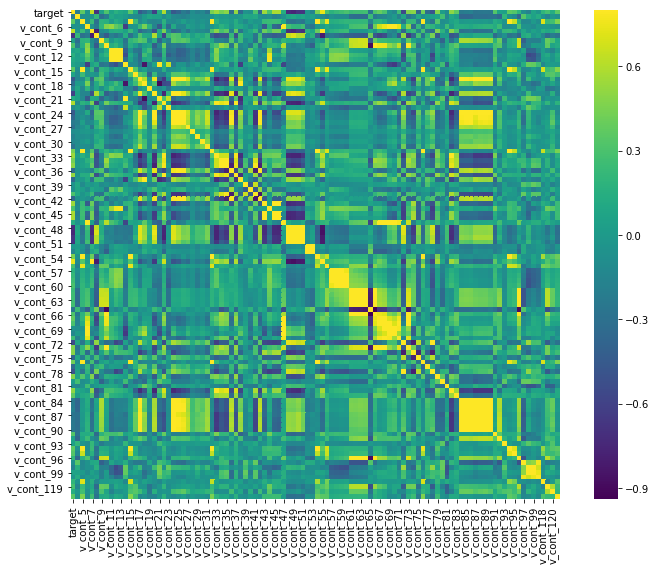

In [27]:
#Correlation matrix (heatmap style)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='viridis')

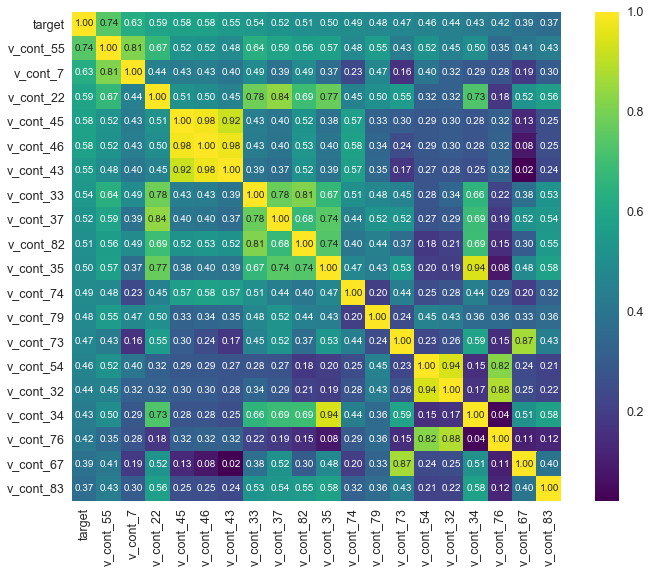

In [28]:
#correlation matrix (zoomed heatmap style)
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='viridis')

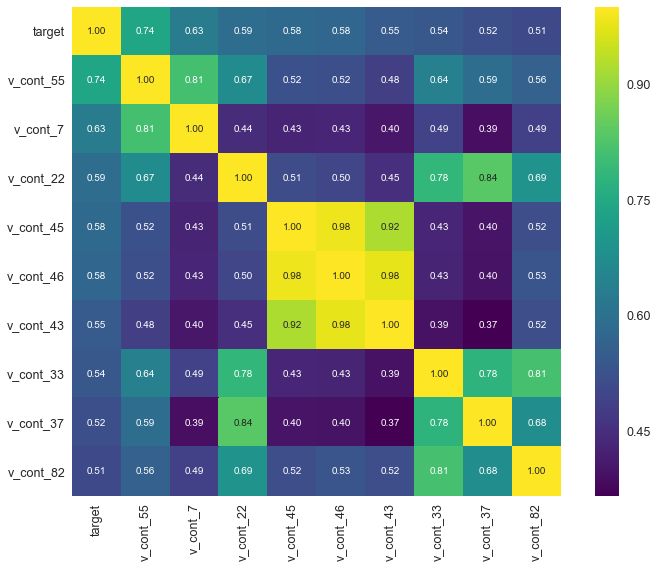

In [29]:
#correlation matrix (zoomed heatmap style)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='viridis')

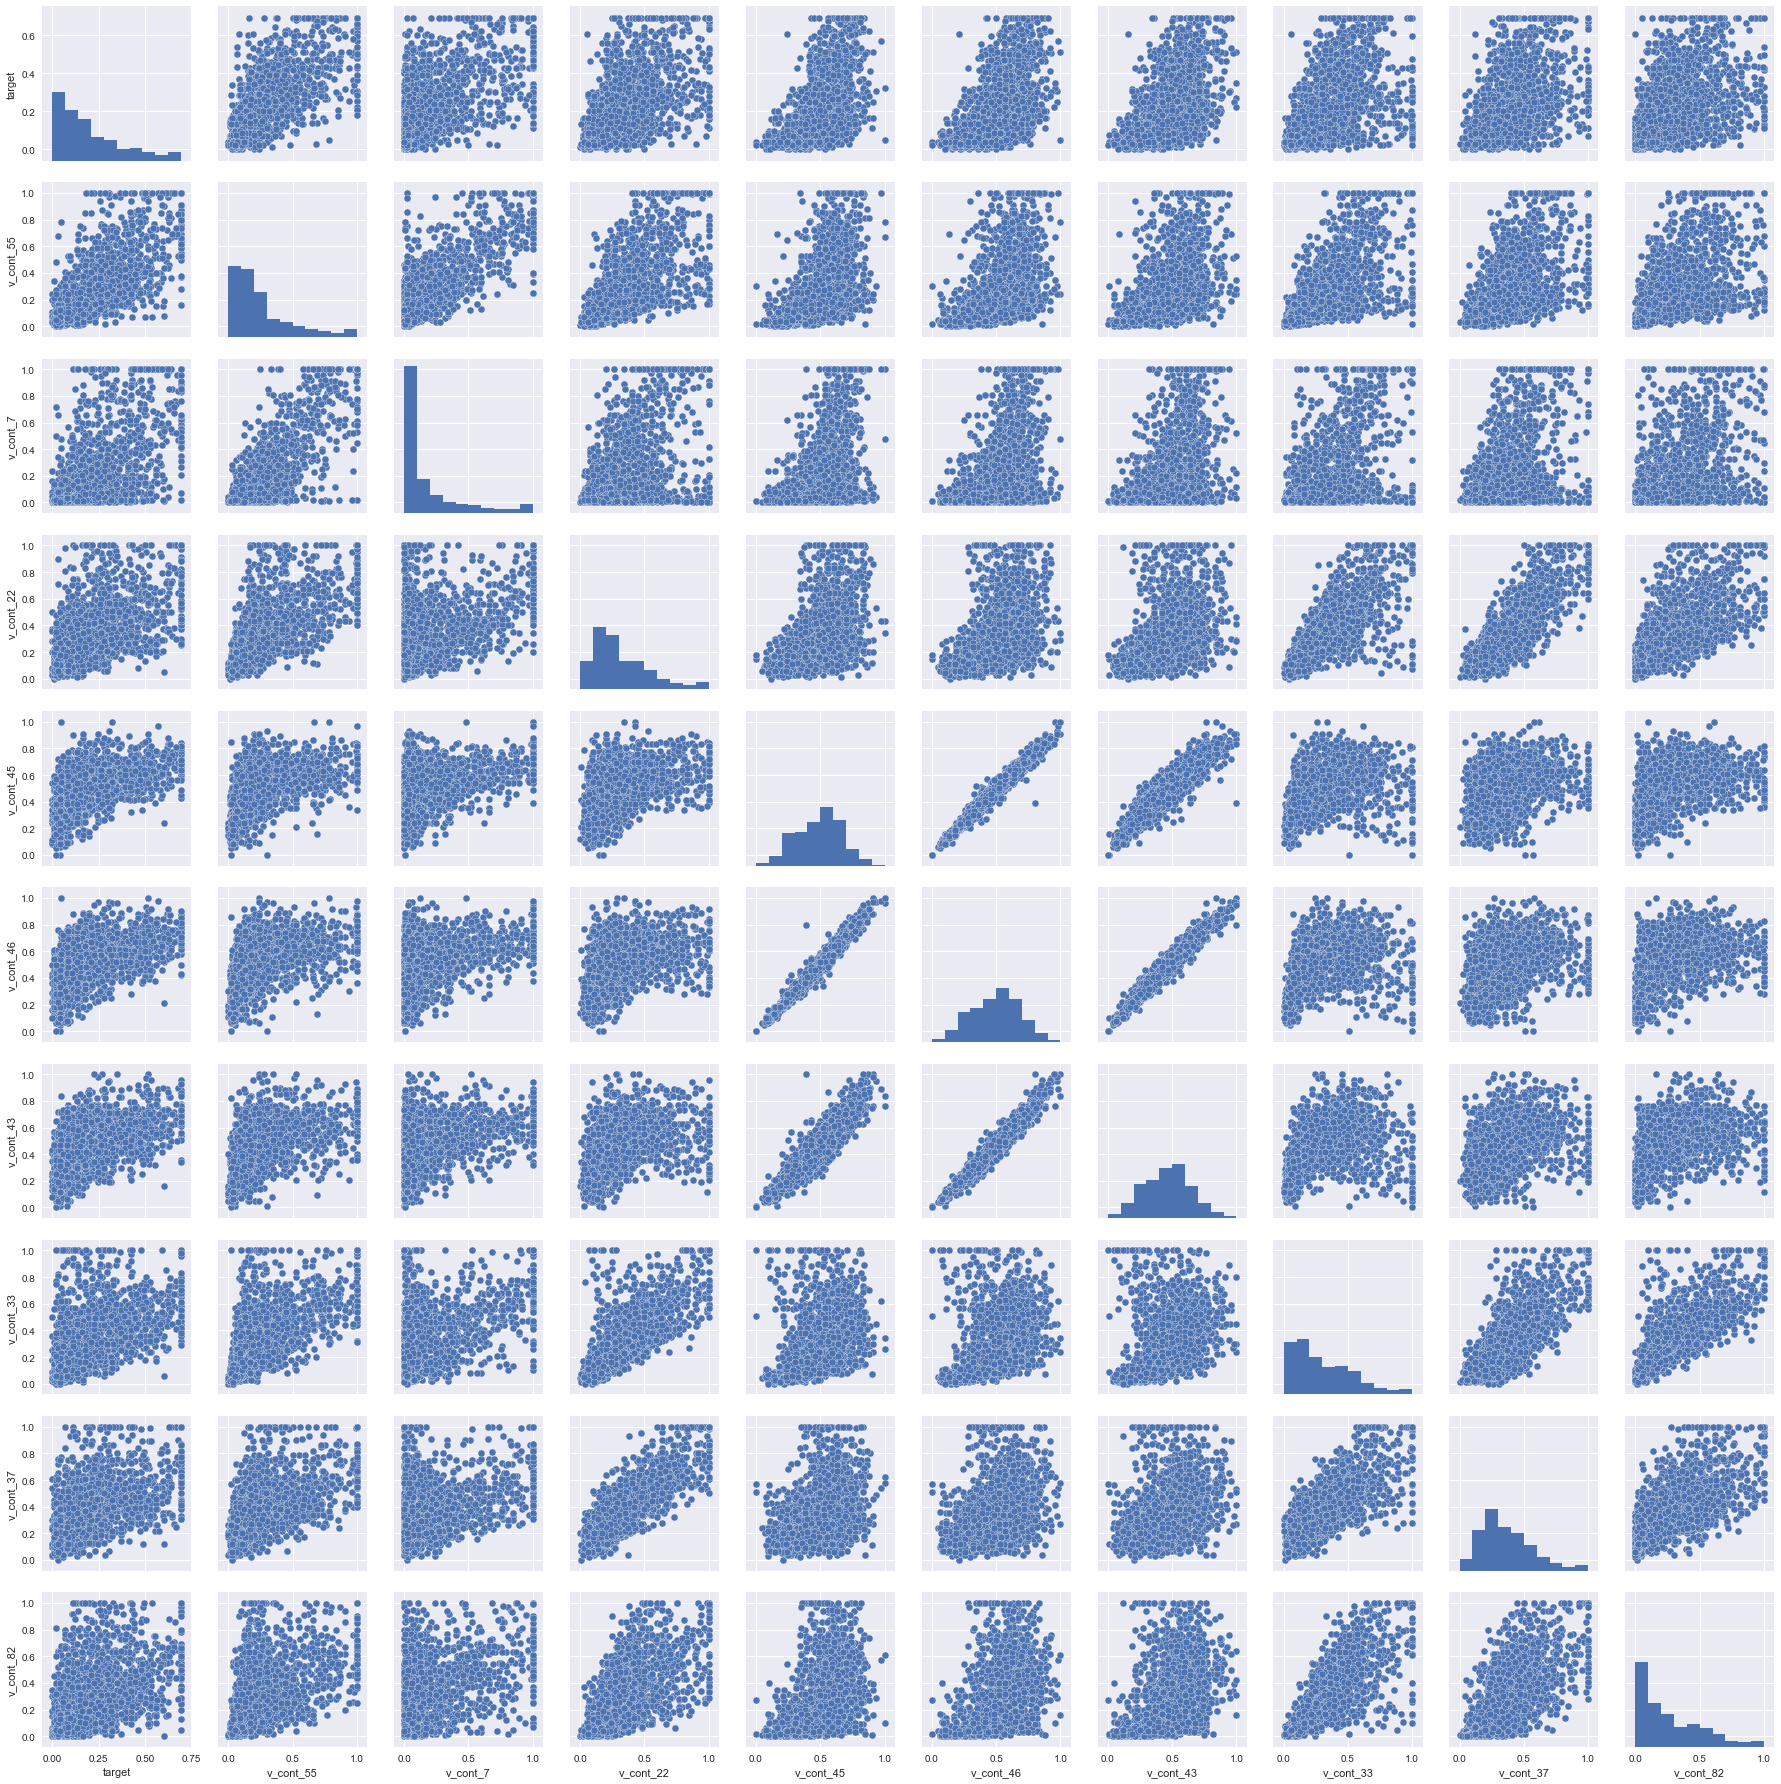

In [29]:
#scatterplot
sns.set()
cols = ['target', 'v_cont_55', 'v_cont_7', 'v_cont_22', 'v_cont_45', 'v_cont_46', 'v_cont_43', 'v_cont_33', 'v_cont_37', 'v_cont_82']
sns.pairplot(df[cols], size = 2.5)
plt.show();

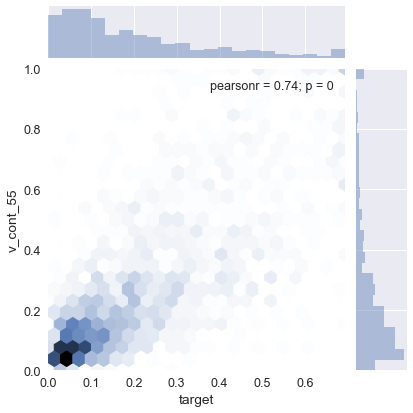

In [30]:
sns.jointplot(data=df, x='target', y='v_cont_55', kind = 'hex')

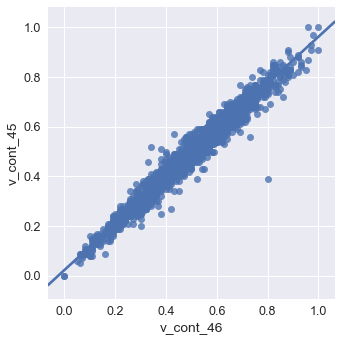

In [31]:
sns.lmplot(x='v_cont_46', y='v_cont_45', data = df)

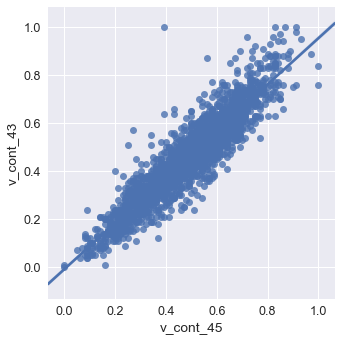

In [32]:
sns.lmplot(x='v_cont_45', y='v_cont_43', data = df)

=> This linear association between two explanatory variables known as colinearity is not limited to these two features. We can easily notice other highly correlated features.

### Principal Component Analysis (PCA)

Text(0.5, 1.0, 'Percentage of Explained Variance')

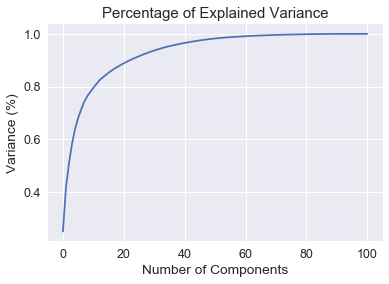

In [75]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Percentage of Explained Variance')

In [76]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train)
principalComponents = pca.fit_transform(X_test)

### Lets start by building a simple Linear Regression Model

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lm.coef_

array([-7.40482558e-03,  6.34311177e-02, -1.07055098e-02,  3.03589827e-02,
       -9.31535125e-03, -2.45955637e-03,  1.67416122e-02,  6.49955222e-03,
       -2.42738658e-02, -5.58462928e-03,  1.11393203e-03, -6.61665360e-02,
        1.72418621e-02, -5.90936243e-02, -2.73496092e-02,  6.71390154e-03,
       -2.21715142e-02,  1.46434736e-02,  5.99301422e-04, -8.92302357e-03,
        6.01898671e-02,  2.84613624e-02, -4.27218402e-02, -3.85976127e-03,
       -5.55391373e-03,  5.40992095e-04,  4.21000771e-03,  1.90001482e-03,
        1.02788324e-02, -2.62477007e-02, -1.09011527e-02,  5.54706647e-03,
       -9.83576638e-04,  4.39116132e-03,  3.12335879e-02, -6.06795571e-03,
       -4.68975528e-03,  6.84619363e-03,  2.31488909e-02,  6.06405993e-02,
        2.85062754e-02,  2.58723526e-02, -7.51002196e-02, -1.79698541e-02,
        1.87545451e-02, -6.20777969e-02, -2.58868596e-03,  5.08846755e-04,
        5.76616117e-03, -1.97775660e-02, -1.05610488e-02,  2.63408987e-02,
       -1.31604346e-02,  

In [80]:
Predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

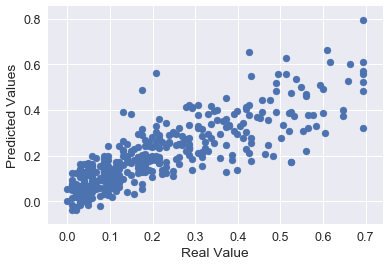

In [81]:
plt.scatter(y_test, Predictions)
plt.xlabel('Real Value')
plt.ylabel('Predicted Values')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [82]:
metrics.mean_absolute_error(y_test, Predictions)

0.06961797281990073

In [83]:
metrics.mean_squared_error(y_test, Predictions)

0.009535195592807926

In [84]:
np.sqrt(metrics.mean_squared_error(y_test, Predictions))

0.09764832611370215

In [85]:
metrics.r2_score(y_test, Predictions)

0.6874214508736289

### Residuals Normality

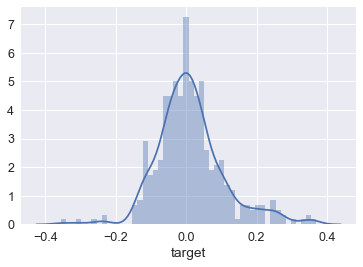

In [56]:
sns.distplot((y_test-Predictions), bins=50)

### Hyperparameter Tuning using Gridsearch for lasso (example)

In [58]:
model = Lasso()

In [59]:
param_grid = [{'alpha':[1.0,0.0,0.1,0.01,0.001], 'max_iter':[100,1000,10000]}]
grid_lasso = GridSearchCV(model, param_grid, cv=10)

In [60]:
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [1.0, 0.0, 0.1, 0.01, 0.001], 'max_iter': [100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
grid_lasso.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

## Ensembling Strategy
### Base models (Weak Learners)

In [86]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [87]:
#LASSO: Linear Model trained with L1 prior as regularizer 
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00, random_state=None))

In [90]:
#ElasticNet: Linear regression with combined L1 and L2 priors as regularizer
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [91]:
#KRR: combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [92]:
#Gradient Boosting for regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [93]:
#XGBoost which is optimized for both memory efficiency and training speed
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [94]:
#Light GBM grows tree vertically meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise 
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores

In [95]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0966 (0.0044)



In [96]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0961 (0.0037)



In [97]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0990 (0.0048)



In [98]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0970 (0.0038)



In [99]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0968 (0.0042)



In [100]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0964 (0.0054)



### Stacking models
#### Let's start with the simplest stacking approach by averaging base models

#### Averaged base models

In [101]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [102]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0942 (0.0040)



It seems even the simplest stacking approach really improve the score . This encourages us to go further and explore a less simple stacking approch.

## Stacking Averaged Models with meta-learner

In [103]:
#Validation function
n_folds = 5

def rmsl_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [104]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=False)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [105]:
stacked_averaged_models = StackingAveragedModels(base_models = (model_lgb, model_xgb, KRR), meta_model = ENet)

In [106]:
score = rmsl_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0950 (0.0039)


We get again a better score by adding a meta learner

In [107]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [108]:
stacked_averaged_models.fit(X_train, y_train.values)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test))
print(rmsle(y_train.values, stacked_train_pred))

0.06459660852290659


# Thank you